In [1]:
import sys
sys.path.append("../")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from algorec.environments import BankLoanApplication
from algorec.populations import BasePopulation
from algorec.recourse import NFeatureRecourse

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 5
N_CAT = 0
N_AGENTS = 100

# Environment variables
THRESHOLD = 0.99
ADAPTATION = 0.3
GROWTH_RATE = 1

In [7]:
# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)
for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, 100)

y = rng.integers(0, 2, 100)
lr = LogisticRegression().fit(df, y)

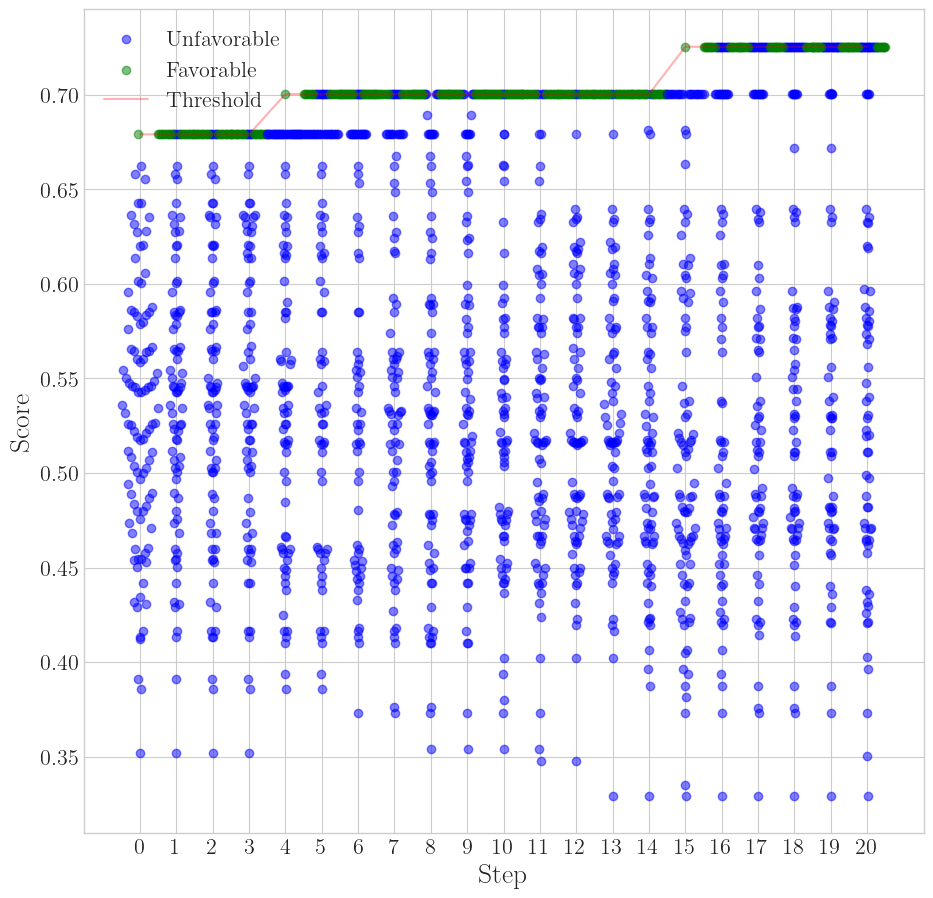

In [11]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication(
    population,
    recourse,
    threshold=THRESHOLD,
    adaptation=ADAPTATION,
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

set_matplotlib_style(16)
environment.plot.agent_scores()
plt.show()

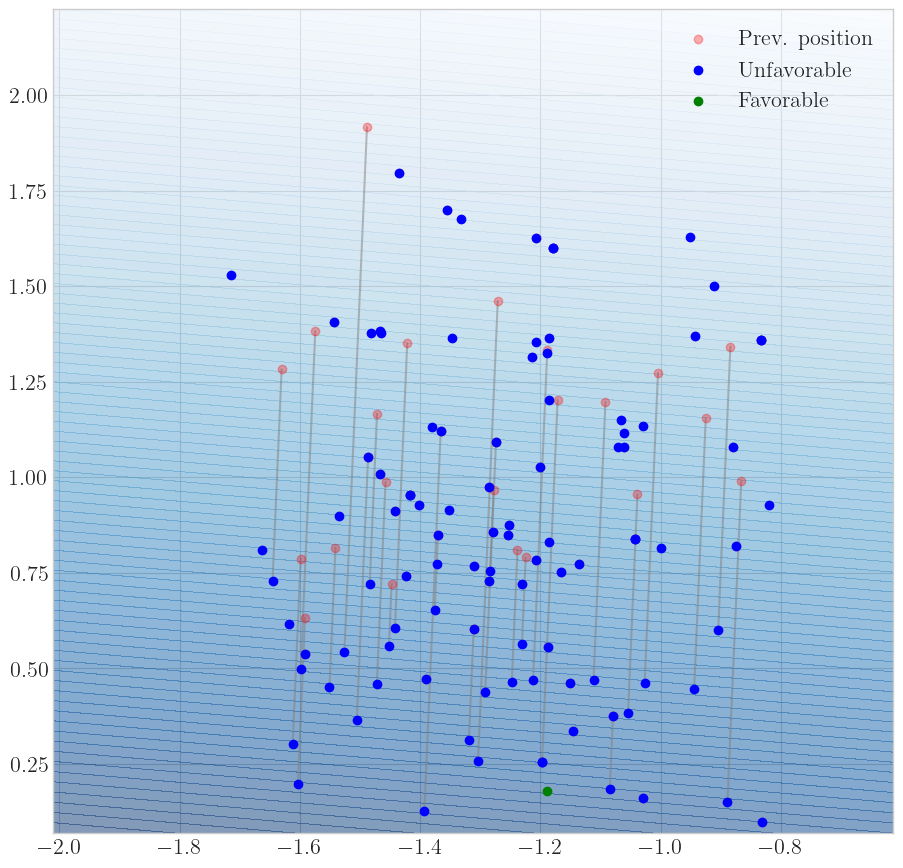

In [12]:
environment.plot.scatter(4)
plt.show()